In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-recommendation-data/lthing_data/lthing_data/reviews.txt
/kaggle/input/social-recommendation-data/lthing_data/lthing_data/edges.txt
/kaggle/input/social-recommendation-data/epinions_data/epinions_data/network_trust.txt
/kaggle/input/social-recommendation-data/epinions_data/epinions_data/network_trustedby.txt
/kaggle/input/social-recommendation-data/epinions_data/epinions_data/epinions.txt


# Data Loading

In [1]:
import os

s = ''
with open('/kaggle/input/social-recommendation-data/lthing_data/lthing_data/reviews.txt') as file:
    s = file.read()
    s = s.split('\n')
    print(len(s))
    s = s[1:500000]

1707072


In [2]:
reviews_file = '/kaggle/input/social-recommendation-data/lthing_data/lthing_data/reviews.txt'

In [3]:
with open(reviews_file, 'r') as file:
    for _ in range(3):  
        print(file.readline())

reviews = {}

reviews[('73960', 'Elizabeth.Wong98')] = {'comment': "Every evening, the brave queen of Persia, Shahrazad, goes into the Sultan's rooms and begins a weave of words, hoping to entice the Sultan to let her live another night so she can continue her story. But Shahrazad has a big problem: She is running out of stories. With a delicate stroke of luck, a cripple girl, Marjan, ventures into the harem with her Aunt to sell various wares. As her Aunt is selling things, Marjan entertains some of the children with a story. Unbeknownst to Marjan, Shahrazad's sister, Dunyazad, has heard her telling the story. Marjan is taken directly to Shahrazad and asked to recount the story. The tale keeps the queen alive another night and the queen decides to keep Marjan.\n As her helper, Marjan has to go into the city and look for tales that the Sultan has not heard. She has several close calls with the Kathun, the voracious female who rules the harem and who is set against \nShahrazad. Finally 

In [4]:
for key, value in list(reviews.items())[:5]:
    print(f"Key: {key}, Value: {value}")
    print("------------")

NameError: name 'reviews' is not defined

## Data Formatting

In [7]:
import ast
import pandas as pd

# Initialize an empty list to store review data
data = []

with open(reviews_file, 'r') as file:
    for line in file:
        if line.strip().startswith("reviews["):  # Skip lines assigning 'reviews'
            key_value = line.strip().split(" = ", 1)[1]  # Extract dictionary part
            review_entry = ast.literal_eval(key_value)
            data.append(review_entry)

# Convert the list of dictionaries directly into a DataFrame
reviews_df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(reviews_df.head())

                                             comment  nhelpful      unixtime  \
0  Every evening, the brave queen of Persia, Shah...         0  1.332288e+09   
1  Its the 1983-84 school year and Edward Zanni o...         0  1.253405e+09   
2  I became privy to this book, when another auth...         0  1.299888e+09   
3                                              .             0  1.327277e+09   
4  This is a tremendous story of a freed woman an...         0  1.329005e+09   

       work flags              user  stars          time  
0     73960    []  Elizabeth.Wong98    4.5  Mar 21, 2012  
1     69413    []            rivkat    3.0  Sep 20, 2009  
2   9523995    []      suz.haugland    4.0  Mar 12, 2011  
3    368228    []        amoskovacs    4.0  Jan 23, 2012  
4  11243828    []            CandyH    4.0  Feb 12, 2012  


In [8]:
reviews_df

,comment,nhelpful,unixtime,work,flags,user,stars,time
0,"Every evening, the brave queen of Persia, Shah...",0,1.332288e+09,73960,[],Elizabeth.Wong98,4.5,"Mar 21, 2012"
1,Its the 1983-84 school year and Edward Zanni o...,0,1.253405e+09,69413,[],rivkat,3.0,"Sep 20, 2009"
2,"I became privy to this book, when another auth...",0,1.299888e+09,9523995,[],suz.haugland,4.0,"Mar 12, 2011"
3,.,0,1.327277e+09,368228,[],amoskovacs,4.0,"Jan 23, 2012"
4,This is a tremendous story of a freed woman an...,0,1.329005e+09,11243828,[],CandyH,4.0,"Feb 12, 2012"
...,...,...,...,...,...,...,...,...
1707065,This is quite possibly the cutest kids book I'...,0,1.327795e+09,129503,[],evementen,NaN,"Jan 29, 2012"
1707066,This is a fairy tale which is very much a Cupi...,0,1.364688e+09,11749693,[],AmyMacEvilly,5.0,"Mar 31, 2013"
1707067,http://tamaranth.blogspot.com/1994/03/guilty-p...,0,1.176682e+09,4873693,[],tamaranth,4.5,"Apr 16, 2007"
1707068,Despus del extraordinario xito de Los ojos ama...,0,1.321920e+09,9705446,[],bibliosa,NaN,"Nov 22, 2011"


In [9]:
# Save the DataFrame to a CSV file
reviews_df[:10].to_csv('/kaggle/working/reviews_processed10.csv', index=False)

In [10]:
# MISSING VALUES IN REVIEWS FILE
missing_values = reviews_df.isnull().sum()
print(missing_values)


comment          0
nhelpful         0
unixtime        90
work             0
flags            0
user             0
stars       319861
time            90
dtype: int64


In [11]:
edges_file = '/kaggle/input/social-recommendation-data/lthing_data/lthing_data/edges.txt'

In [12]:
with open(edges_file, 'r') as file:
    for _ in range(3):  
        print(file.readline())

Rodo anehan

Rodo sevilemar

Rodo dingsi



In [13]:
# Load edges into a DataFrame
edges_data = []
with open(edges_file, 'r') as file:
    for line in file:
        users = line.strip().split()  # Split by whitespace to get the two usernames
        if len(users) == 2:  # Ensure only valid pairs
            edges_data.append(users)

edges_df = pd.DataFrame(edges_data, columns=['user1', 'user2'])

In [14]:
edges_df

,user1,user2
0,Rodo,anehan
1,Rodo,sevilemar
2,Rodo,dingsi
3,Rodo,slash
4,RelaxedReader,AnnRig
...,...,...
219785,Capfox,lampbane
219786,Capfox,maberry
219787,Capfox,raphinou
219788,Capfox,library1359


In [15]:
#MISSING DATA FROM EDGES FILE
missing_values_1 = edges_df.isnull().sum()
print(missing_values_1)

user1    0
user2    0
dtype: int64


In [16]:
merged_df = edges_df.merge(reviews_df, left_on='user1', right_on='user', how='left')

# Display merged data
print(merged_df.head())

  user1   user2                                            comment  nhelpful  \
0  Rodo  anehan  This book is enjoyable, but it doesn't quite m...         0   
1  Rodo  anehan  All traditions were new once upon a time. This...         0   
2  Rodo  anehan  I really can't recommend this books. I wanted ...         1   
3  Rodo  anehan  I didn't expect much of this book when I bough...         0   
4  Rodo  anehan  If you are expecting a logical explanation of ...         0   

       unixtime     work flags  user  stars          time  
0  1.250122e+09  2926113    []  Rodo    3.0  Aug 13, 2009  
1  1.240963e+09   162191    []  Rodo    4.0  Apr 29, 2009  
2  1.239667e+09  2044763    []  Rodo    1.0  Apr 14, 2009  
3  1.239667e+09  3116531    []  Rodo    1.5  Apr 14, 2009  
4  1.240790e+09    58874    []  Rodo    3.5  Apr 27, 2009  


In [17]:
# # Save the merged data if needed
# merged_df.to_csv('/kaggle/working/merged_edges_reviews.csv', index=False)
# # Save the merged data if needed
merged_df[:10].to_csv('/kaggle/working/merged_edges_reviews_10.csv', index=False)

# EDA

In [18]:
connection_counts = edges_df['user1'].value_counts()
print(connection_counts.head(10))  # Top 10 users with the most connections

user1
theoldman           3776
rolandperkins       2786
gangleri             704
carterchristian1     603
edlynskey            557
Autodafe             534
AllieW               526
amanaceerdh          479
angrystarlyt         404
Kushana              389
Name: count, dtype: int64


In [19]:
#Review Sentiment by Network
avg_rating_per_user = merged_df.groupby('user1')['stars'].mean().reset_index()
avg_rating_per_user.columns = ['user1', 'avg_rating']
print(avg_rating_per_user.head())

           user1  avg_rating
0      -AlyssaE-    4.000000
1       -HarryH-    4.500000
2  -LoveofBooks-    4.166667
3         -MiSa-    2.500000
4         -Mimi-    4.192308


In [20]:
helpful_votes_per_user = merged_df.groupby('user1')['nhelpful'].sum().reset_index()
helpful_votes_per_user.columns = ['user1', 'total_helpful_votes']
print(helpful_votes_per_user.sort_values(by='total_helpful_votes', ascending=False).head())

              user1  total_helpful_votes
21949  richardderus               514416
9001       Whisper1               474369
25217     wisewoman               316830
11377        brenzi               198774
12792       danielx               198320


https://medium.com/@chaitanya6575/graph-neural-networks-for-social-recommendation-summary-9e6bf7dfbf76

In [21]:
import networkx as nx
# Create a graph from edges
G = nx.from_pandas_edgelist(edges_df, source='user1', target='user2')

# Find centrality measures (influential users)
degree_centrality = nx.degree_centrality(G)
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10])  # Top 10 influential users

[('theoldman', 0.05178557889150049), ('rolandperkins', 0.04197437258321328), ('Smethers', 0.010599742209416937), ('carterchristian1', 0.00902267040715748), ('edlynskey', 0.008431268481310183), ('Autodafe', 0.008082492986579726), ('gangleri', 0.008006672226855712), ('amanaceerdh', 0.007764045795738873), ('AllieW', 0.007400106149063613), ('angrystarlyt', 0.006202138145424217)]


Number of nodes: 2835
Number of edges: 2000
Subgraph has 850 nodes and 177 edges


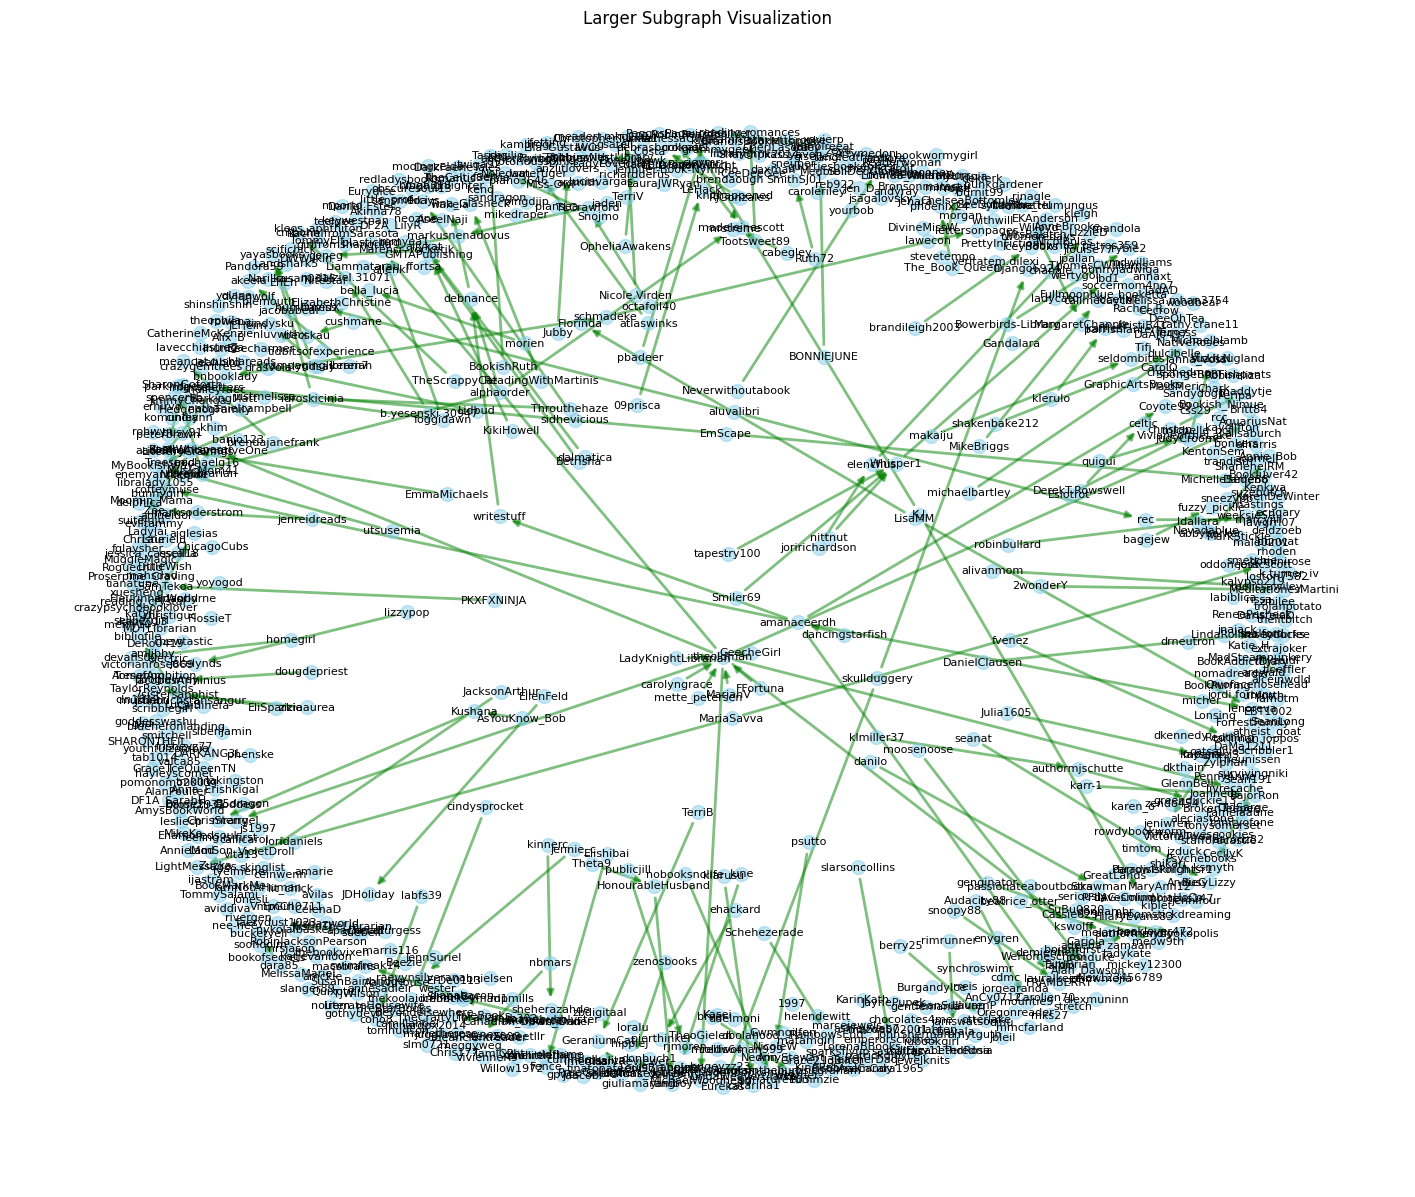

In [53]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Sample edges from your edges dataframe (adjusting sample size)
edges_df_subset = edges_df.sample(n=2000, random_state=42)  # Select 5000 random edges

# Create the directed graph from the larger edges subset
G = nx.DiGraph()

# Add edges to the graph
G.add_edges_from(edges_df_subset[['user1', 'user2']].values)

# Check the number of nodes and edges
print(f"Number of nodes: {len(G.nodes)}")
print(f"Number of edges: {len(G.edges)}")

# Sample a larger subset of nodes (e.g., 50% or more of nodes)
sample_nodes = np.random.choice(list(G.nodes), size=int(0.3 * len(G.nodes)), replace=False)

# Create a subgraph containing only these nodes and all edges between them
subgraph = G.subgraph(sample_nodes)

# Check the size of the subgraph
print(f"Subgraph has {len(subgraph.nodes)} nodes and {len(subgraph.edges)} edges")

# Layout for the larger graph (Spring layout is good for larger graphs)
layout = nx.spring_layout(subgraph, seed=42, k=0.15)  # Adjust `k` for better spacing

# Plot the larger subgraph
plt.figure(figsize=(18, 15))  # Increase the figure size for a larger graph
nx.draw_networkx_nodes(subgraph, layout, node_size=100, node_color='skyblue', alpha=0.5)
nx.draw_networkx_edges(subgraph, layout, edgelist=subgraph.edges(), width=2, alpha=0.5, edge_color='green', arrowsize=10)
nx.draw_networkx_labels(subgraph, layout, font_size=8, font_color='black')

# Display plot
plt.title('Larger Subgraph Visualization')
plt.axis('off')  # Remove axis for better visibility
plt.show()


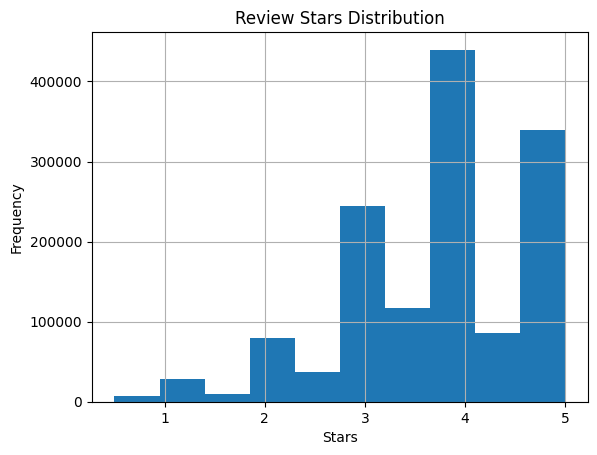

In [29]:

import matplotlib.pyplot as plt
reviews_df['stars'].hist(bins=10)
plt.title('Review Stars Distribution')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

The grapg represents the 'stars' ratings are left-skewed.

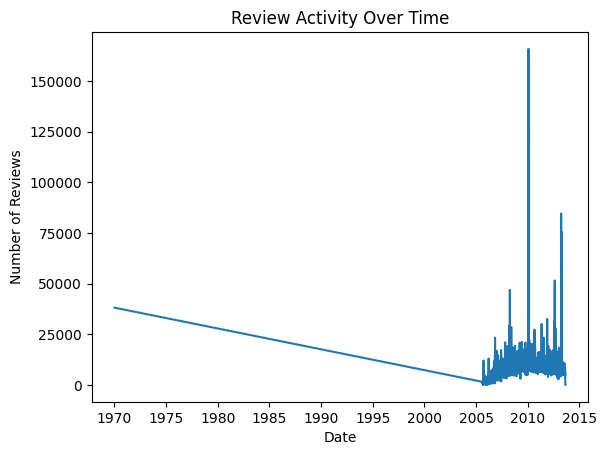

In [30]:
#TIME-SERIES DATA ANALYSIS
merged_df['review_date'] = pd.to_datetime(merged_df['unixtime'], unit='s')
review_activity = merged_df.groupby(merged_df['review_date'].dt.date).size()
review_activity.plot(kind='line', title='Review Activity Over Time', xlabel='Date', ylabel='Number of Reviews')
plt.show()

# Analysis/ Interpretation

1. Top Users by Connections:        
*  Most Connected Users: The users theoldman, rolandperkins, and gangleri have the highest number of social connections.These users are likely central figures in the social network, suggesting they interact widely or have substantial influence.          

2. User Review Behavior: 
* Average Ratings by User:    The users show varying average ratings, reflecting different reviewing tendencies.    Users like -HarryH- (average rating 4.5) tend to give higher ratings, indicating they either enjoy most works or are lenient reviewers.
* Helpful Votes:    Users such as richardderus and Whisper1 have accumulated a significant number of helpful votes, indicating their reviews are widely read and considered useful by others.
  These users might be considered thought leaders in the community.                     
3. Network Centrality
* Degree Centrality:Users like theoldman, rolandperkins, and Smethers are influential within the social graph, with high centrality scores. They likely act as hubs, bridging multiple smaller user groups.

4. Review Star Distribution 
* The histogram shows that most reviews are positive, with many 4- and 5-star ratings which shows it is left-skewed.This indicates that users are generally satisfied with the works they are reviewing, or there may be some bias towards positive reviews.

5. Review Activity Over Time 
* The sharp increase in review activity from around 2005 to 2015 suggests the platform gained significant traction during this period.The early low-frequency activity might indicate either fewer users or missing data from earlier years.



# (GRAPH ANALYSIS) Data preprocessing

In [31]:
#DUPLICATE EDGES
# Before removing duplicates
print("Number of rows before removing duplicates:", len(edges_df))

# Remove duplicates
edges_df = edges_df.drop_duplicates()

# After removing duplicates
print("Number of rows after removing duplicates:", len(edges_df))

# Check if any duplicates remain
print("Number of duplicate rows remaining:", edges_df.duplicated().sum())

Number of rows before removing duplicates: 219790
Number of rows after removing duplicates: 202178
Number of duplicate rows remaining: 0


In [32]:
# Count self-loops before removal
print("Number of self-loops before removal:", (edges_df['user1'] == edges_df['user2']).sum())

# Remove self-loops
edges_df = edges_df[edges_df['user1'] != edges_df['user2']]

# Count self-loops after removal
print("Number of self-loops after removal:", (edges_df['user1'] == edges_df['user2']).sum())


Number of self-loops before removal: 4
Number of self-loops after removal: 0


**There are no duplicates or self loops for the edges file.**

In [33]:
#dropping missing values of stars  
reviews_df = reviews_df.dropna(subset=['stars'])

# Check if there are any remaining missing values in 'stars'
print("Remaining missing values in 'stars':", reviews_df['stars'].isna().sum())

# Check overall for any missing values
print("Total missing values in the dataset:")
print(reviews_df.isna().sum())


Remaining missing values in 'stars': 0
Total missing values in the dataset:
comment      0
nhelpful     0
unixtime    84
work         0
flags        0
user         0
stars        0
time        84
dtype: int64


In [34]:
# Filter edges_df to only include users that exist in reviews_df
valid_users = set(reviews_df['user'])
edges_df = edges_df[edges_df['user1'].isin(valid_users) & edges_df['user2'].isin(valid_users)]

#Ensure consistency between the two DataFrames by matching user IDs.

In [35]:
# Calculate average rating for each user
avg_ratings = reviews_df.groupby('user')['stars'].mean().reset_index()
avg_ratings.columns = ['user', 'avg_rating']
# Display the first few rows of the avg_ratings DataFrame
print(avg_ratings.head())

#Average Ratings: If a user has multiple reviews, you may want to calculate their average rating to set as an attribute.
#Normalization: Normalize numerical features such as ratings if they are used in centrality or other calculations.


              user  avg_rating
0                          4.0
1  %C3%90ark-Angel         5.0
2           ---fan         3.0
3        -AlyssaE-         4.0
4         -Carmen-         4.5


In [36]:
edges_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103553 entries, 3 to 219789
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   user1   103553 non-null  object
 1   user2   103553 non-null  object
dtypes: object(2)
memory usage: 2.4+ MB


In [37]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1387209 entries, 0 to 1707069
Data columns (total 8 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   comment   1387209 non-null  object 
 1   nhelpful  1387209 non-null  int64  
 2   unixtime  1387125 non-null  float64
 3   work      1387209 non-null  object 
 4   flags     1387209 non-null  object 
 5   user      1387209 non-null  object 
 6   stars     1387209 non-null  float64
 7   time      1387125 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 95.3+ MB


**GRAPH ANALYSIS**

In [38]:
# Import necessary libraries
import pandas as pd
import networkx as nx


# Display the first few rows of each dataframe for verification
print(reviews_df.head())
print(edges_df.head())


                                             comment  nhelpful      unixtime  \
0  Every evening, the brave queen of Persia, Shah...         0  1.332288e+09   
1  Its the 1983-84 school year and Edward Zanni o...         0  1.253405e+09   
2  I became privy to this book, when another auth...         0  1.299888e+09   
3                                              .             0  1.327277e+09   
4  This is a tremendous story of a freed woman an...         0  1.329005e+09   

       work flags              user  stars          time  
0     73960    []  Elizabeth.Wong98    4.5  Mar 21, 2012  
1     69413    []            rivkat    3.0  Sep 20, 2009  
2   9523995    []      suz.haugland    4.0  Mar 12, 2011  
3    368228    []        amoskovacs    4.0  Jan 23, 2012  
4  11243828    []            CandyH    4.0  Feb 12, 2012  
            user1       user2
3            Rodo       slash
4   RelaxedReader      AnnRig
5   RelaxedReader   bookbroke
6   RelaxedReader  Bumpersmom
12        Jayne

In [39]:
# Create a graph using NetworkX

G = nx.DiGraph()  # Use nx.DiGraph() if directed edges are needed

# Add edges from edges_df to the graph
G.add_edges_from(edges_df[['user1', 'user2']].values)

# Display basic information about the graph
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')


Number of nodes: 21359
Number of edges: 103553


In [40]:
# Check for isolated nodes
isolated_nodes = list(nx.isolates(G))
print(f'Number of isolated nodes: {len(isolated_nodes)}')

Number of isolated nodes: 0


#Sparse connectivity: The graph is sparse, meaning most nodes are connected by only one or a few edges.
#This shows every node in your graph has at least one connection. 

In [41]:
# Get the degree of each node(CHECKING DEGREE CENTRALITY - OUTGOING LINKS)
degree_dict = dict(G.degree())
print(f'Minimum degree: {min(degree_dict.values())}')
print(f'Maximum degree: {max(degree_dict.values())}')


Minimum degree: 1
Maximum degree: 3112


In [42]:
# Add all users from reviews_df as nodes if they are not already in G
for user in reviews_df['user'].unique():
    if user not in G:
        G.add_node(user)

# Iterate through reviews_df and add attributes to nodes
for _, row in avg_ratings.iterrows():  # Using avg_ratings DataFrame
    user = row['user']
    avg_stars = row['avg_rating']
    if user in G:  # Check if the user is in the graph
        G.nodes[user]['avg_rating'] = avg_stars

# Check if attributes were added
print(f"Sample node data: {list(G.nodes(data=True))[:5]}")


Sample node data: [('Rodo', {'avg_rating': 2.6}), ('slash', {'avg_rating': 3.3452380952380953}), ('RelaxedReader', {'avg_rating': 3.619047619047619}), ('AnnRig', {'avg_rating': 3.3666666666666667}), ('bookbroke', {'avg_rating': 3.0})]


In [43]:

# Find centrality measures (popular users)
degree_centrality = nx.degree_centrality(G)
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10])  # Top 10 influential users

[('theoldman', 0.044068084624316745), ('rolandperkins', 0.0186354753745504), ('amanaceerdh', 0.007575972131751112), ('Whisper1', 0.0056925996204933585), ('AllieW', 0.005579314055906426), ('nownewstrue', 0.005550992664759693), ('DanielClausen', 0.005338582231159195), ('callmejacx', 0.0051120111019853295), ('carterchristian1', 0.0051120111019853295), ('mmignano11', 0.005097850406411963)]


Degree Centrality:Users like theoldman, rolandperkins, and edlynskey are influential within the social graph, with high centrality scores. They likely act as hubs, bridging multiple smaller user groups.

In [44]:
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
#print("\nTop 10 by Closeness Centrality:")
print(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

[('theoldman', 0.07872725311261788), ('callmejacx', 0.06698458630873577), ('Whisper1', 0.06674505047028675), ('DevourerOfBooks', 0.06616666808546638), ('avaland', 0.06608310009604211), ('AsYouKnow_Bob', 0.06605984825496516), ('amanaceerdh', 0.06590570679025856), ('aluvalibri', 0.06539393055173728), ('ablachly', 0.06520156009966378), ('clamairy', 0.06514034672405743)]


In [ ]:
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)
#print("\nTop 10 by Betweenness Centrality:")
print(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])


For large graphs, centrality measures like betweenness may consume a lot of memory and computational power.
Centrality Calculations:

Degree Centrality: Linear in the number of edges; fast even for large graphs.
Closeness Centrality: Requires shortest path calculations, which can be slow for large graphs (roughly 
𝑂(𝑁2)
O(N 2) for unweighted graphs).
Betweenness Centrality: Computationally expensive (𝑂(𝑁3)
O(N 3 ) for unweighted graphs), and it becomes slower for large networks.

In [39]:
!pip install python-igraph


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [40]:
!pip install pycairo


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.5/661.5 kB 8.1 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycairo: filename=pycairo-1.27.0-cp310-cp310-linux_x86_64.whl size=125825 sha256=aa3f4abc666a2c1ba5b0b9b73039f701e5c9d880d77f9e4d7ddd71dd5516deb9
  Stored in directory: /root/.cache/pip/wheels/c3/76/e4/134a2e849a3082926653cb544793d9642aed12399436f422d1
Successfully built pycairo

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [41]:
import igraph as ig
print(ig.__version__)


0.11.8


In [45]:
import igraph as ig
import pandas as pd

# Create a directed graph from edges_df
edge_list = edges_df[['user1', 'user2']].values.tolist()
G = ig.Graph.TupleList(edge_list, directed=True)

# Add missing nodes from reviews_df if not in the graph
all_users = set(reviews_df['user'].unique())
existing_nodes = set(G.vs['name'])  # Existing nodes in the graph
missing_users = all_users - existing_nodes
G.add_vertices(list(missing_users))

# Compute centrality measures
degree_centrality = G.degree()  # Degree centrality
closeness_centrality = G.closeness()  # Closeness centrality
betweenness_centrality = G.betweenness()  # Betweenness centrality

# Add centrality measures as node attributes
G.vs['degree_centrality'] = degree_centrality
G.vs['closeness_centrality'] = closeness_centrality
G.vs['betweenness_centrality'] = betweenness_centrality

# Sample node data (including centrality measures)
sample_node_data = [
    {'name': v['name'],
     'degree_centrality': v['degree_centrality'],
     'closeness_centrality': v['closeness_centrality'],
     'betweenness_centrality': v['betweenness_centrality']}
    for v in G.vs[:5]
]
print(f"Sample node data: {sample_node_data}")


Sample node data: [{'name': 'Rodo', 'degree_centrality': 1, 'closeness_centrality': 0.18965742480730774, 'betweenness_centrality': 0.0}, {'name': 'slash', 'degree_centrality': 11, 'closeness_centrality': 0.2340430808913801, 'betweenness_centrality': 18997.49519381443}, {'name': 'RelaxedReader', 'degree_centrality': 6, 'closeness_centrality': 0.22889681269102022, 'betweenness_centrality': 1035.115025279746}, {'name': 'AnnRig', 'degree_centrality': 8, 'closeness_centrality': 0.23525085696478654, 'betweenness_centrality': 26328.17983475027}, {'name': 'bookbroke', 'degree_centrality': 56, 'closeness_centrality': 0.29197091584158413, 'betweenness_centrality': 467941.61249894346}]


In [46]:
# Create a DataFrame with centrality features for each user
centrality_df = pd.DataFrame({
    'user': G.vs['name'],  # Node names
    'degree_centrality': G.vs['degree_centrality'],  # Degree centrality
    'closeness_centrality': G.vs['closeness_centrality'],  # Closeness centrality
    'betweenness_centrality': G.vs['betweenness_centrality']  # Betweenness centrality
})

# Merge with reviews_df to get star ratings
merged_df = pd.merge(reviews_df[['user', 'stars']], centrality_df, on='user', how='left')

# Check the merged DataFrame
print(merged_df.head())


               user  stars  degree_centrality  closeness_centrality  \
0  Elizabeth.Wong98    4.5                  4              0.117006   
1            rivkat    3.0                 27              0.264309   
2      suz.haugland    4.0                100              0.255753   
3        amoskovacs    4.0                  1              0.264621   
4            CandyH    4.0                  4              0.188979   

   betweenness_centrality  
0                0.000000  
1           126396.510999  
2           422799.447644  
3                0.000000  
4                0.000000  


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Ensure no missing values
merged_df.fillna(0, inplace=True)  # Replace NaN values with 0

# Define features (X) and target (y)
X = merged_df[['degree_centrality', 'closeness_centrality', 'betweenness_centrality']]
y = merged_df['stars']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


# Optional: Feature importances
importances = model.feature_importances_
print(f"Feature Importances: {dict(zip(X.columns, importances))}")


Mean Squared Error: 0.9075177220424988
Feature Importances: {'degree_centrality': 0.16347909092259014, 'closeness_centrality': 0.5362406366953348, 'betweenness_centrality': 0.3002802723820751}


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate additional evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared value

# Print results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.9075177220424988
Root Mean Squared Error (RMSE): 0.9526372457774779
Mean Absolute Error (MAE): 0.7412260064157346
R-squared (R²): 0.09026329400085709


In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define features (X) and target (y)
X = merged_df[['degree_centrality', 'closeness_centrality', 'betweenness_centrality']]
y = merged_df['stars']

# Initialize the model with fewer estimators and parallel processing
model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)  # Reduce n_estimators and use all cores

# Perform 3-fold cross-validation to speed up the process
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Print cross-validation scores (in negative MSE)
print(f'Cross-validation MSE scores (negatives): {cv_scores}')

# Convert them to positive MSE values
positive_cv_scores = -cv_scores
print(f'Cross-validation MSE scores (positive): {positive_cv_scores}')

# Calculate and print the mean and standard deviation of the cross-validation MSE
mean_mse = np.mean(positive_cv_scores)
std_mse = np.std(positive_cv_scores)

print(f'Mean Cross-Validation MSE: {mean_mse}')
print(f'Standard Deviation of MSE: {std_mse}')


Cross-validation MSE scores (negatives): [-0.90733528 -0.91238426 -0.90533693 -0.90779978 -0.9118245 ]
Cross-validation MSE scores (positive): [0.90733528 0.91238426 0.90533693 0.90779978 0.9118245 ]
Mean Cross-Validation MSE: 0.9089361521291147
Standard Deviation of MSE: 0.0027217850982635774


In [51]:
# Create a DataFrame to compare actual vs predicted ratings
predictions = pd.DataFrame({'Actual Rating': y_test.values, 'Predicted Rating': y_pred})
print(predictions)


        Actual Rating  Predicted Rating
0                 5.0          3.842891
1                 4.0          3.107645
2                 5.0          3.649622
3                 5.0          3.842891
4                 1.0          3.842891
...               ...               ...
277437            3.0          3.842891
277438            4.0          3.868357
277439            4.5          3.948136
277440            5.0          3.842891
277441            4.0          3.318036

[277442 rows x 2 columns]


In [34]:
!pip install node2vec lightgbm networkx scikit-learn pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 32.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 40.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [43]:
import networkx as nx
import pandas as pd
import numpy as np
from node2vec import Node2Vec
from sklearn.model_selection import train_test_split, cross_val_score
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error


In [44]:
# Create a directed graph
G = nx.DiGraph()

# Add edges from edges_df
G.add_edges_from(edges_df[['user1', 'user2']].values)


In [37]:
# Add all users from reviews_df as nodes if they are not already in G
for user in reviews_df['user'].unique():
    if user not in G:
        G.add_node(user)


In [45]:
# Randomly sample a subset of nodes (e.g., 10% of nodes)
sample_nodes = np.random.choice(list(G.nodes), size=int(0.1 * len(G.nodes)), replace=False)

# Create a subgraph with the sampled nodes
subgraph = G.subgraph(sample_nodes)

# Check the size of the subgraph
print(f"Subgraph has {len(subgraph.nodes)} nodes and {len(subgraph.edges)} edges")


Subgraph has 2413 nodes and 1228 edges


In [46]:
# Apply Node2Vec to generate embeddings for each node in the subgraph
node2vec = Node2Vec(subgraph, dimensions=64, walk_length=30, num_walks=200, workers=4, quiet=True)
node2vec_model = node2vec.fit()

# Create embedding features for each node (user) in the subgraph
embeddings = {str(node): node2vec_model.wv[str(node)] for node in subgraph.nodes}

# Convert the embeddings into a DataFrame
embeddings_df = pd.DataFrame.from_dict(embeddings, orient='index')
embeddings_df['user'] = embeddings_df.index

# Preview the embeddings DataFrame
embeddings_df.head()


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,user
bongster,0.015389,-0.014247,0.010226,0.003247,0.008354,-0.010692,-0.013725,0.014520,0.004580,-0.007015,...,0.012852,0.008352,-0.009182,-0.009593,0.007152,-0.013457,-0.003017,-0.014695,0.008504,bongster
reneebooks,-0.044089,-0.631113,0.217888,0.324493,-0.177050,0.249878,-0.924901,-0.156833,-0.507493,-0.262719,...,-0.071313,0.277354,-0.143693,-0.726297,0.604258,-0.740433,-0.455954,-0.410591,0.385426,reneebooks
SarahNYI,-0.015587,0.010493,0.015561,0.001937,-0.011977,-0.004365,-0.003660,0.001116,-0.003440,0.013754,...,-0.010008,-0.015483,0.009436,-0.012200,0.007085,0.012323,0.000192,0.002550,0.000507,SarahNYI
mramos,0.002081,0.009033,-0.000619,-0.009485,-0.000796,0.014768,-0.000204,-0.005803,0.013556,0.008459,...,0.007396,0.010110,-0.000331,0.011682,0.013082,-0.009195,-0.012727,0.007570,0.008271,mramos
Saponaria,0.015372,-0.004496,-0.012272,0.009716,0.001786,0.006742,-0.008884,-0.003714,-0.013099,0.013048,...,-0.012158,-0.004657,-0.004740,-0.000478,-0.005139,0.013288,-0.002714,0.008141,-0.011637,Saponaria


In [47]:
# Assuming reviews_df is available and contains users with missing star ratings
# Merge embeddings_df with reviews_df based on 'user' column
merged_df = pd.merge(reviews_df, embeddings_df, on='user', how='left')

# Check merged DataFrame
print(merged_df.head())


                                             comment  nhelpful      unixtime  \
0  Every evening, the brave queen of Persia, Shah...         0  1.332288e+09   
1  Its the 1983-84 school year and Edward Zanni o...         0  1.253405e+09   
2  I became privy to this book, when another auth...         0  1.299888e+09   
3                                              .             0  1.327277e+09   
4  This is a tremendous story of a freed woman an...         0  1.329005e+09   

       work flags              user  stars          time         0         1  \
0     73960    []  Elizabeth.Wong98    4.5  Mar 21, 2012 -0.010877 -0.000056   
1     69413    []            rivkat    3.0  Sep 20, 2009       NaN       NaN   
2   9523995    []      suz.haugland    4.0  Mar 12, 2011       NaN       NaN   
3    368228    []        amoskovacs    4.0  Jan 23, 2012 -0.012703 -0.005335   
4  11243828    []            CandyH    4.0  Feb 12, 2012       NaN       NaN   

   ...        54        55        56  

In [50]:
# Drop non-numeric columns that LightGBM cannot handle
X = merged_df.drop(columns=['stars', 'user', 'comment', 'work', 'flags', 'time'])

# Handle missing stars by filling with the mean
merged_df['stars'] = merged_df['stars'].fillna(merged_df['stars'].mean())

# Define target and features
y = merged_df['stars']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (LightGBM Regressor)
model = LGBMRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.101403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16548
[LightGBM] [Info] Number of data points in the train set: 1365656, number of used features: 66
[LightGBM] [Info] Start training from score 3.805472
RMSE: 0.8947853434196594


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [52]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as file:
    print("saving......")
    pickle.dump(model, file)



saving......


In [44]:
# Save predictions and actual ratings to a CSV file
predictions = pd.DataFrame({'Actual Rating': y_test.values, 'Predicted Rating': y_pred})
predictions.to_csv('predicted_ratings.csv', index=False)

print("Predictions saved to 'predicted_ratings.csv'.")


Predictions saved to 'predicted_ratings.csv'.
